<a href="https://colab.research.google.com/github/Vinayak-Sharma12/LangGraph/blob/main/7_Prompt_Chaining(Story_Generator).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROMPT CHAINING -> Prompt Chaining is simple technique in which we complete complex task by using nodes with prompts sequentially

# TASK is Make Story Generator which Generates Story,Improvise it,Polish it

1. Generate Story
2. Improvise it
3. Polish it

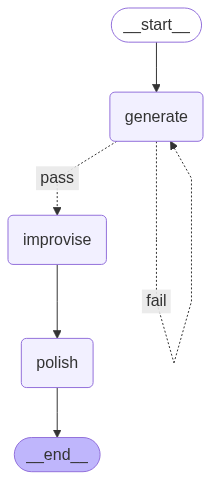

In [24]:
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [1]:
!pip install -q langchain langgraph langchain_groq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.6/129.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 10.9 MB/s eta 0:00:00


In [2]:
from langchain_groq import ChatGroq
llm=ChatGroq(model='llama-3.1-8b-instant',api_key='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')

CREATE STATE

In [4]:
from typing import TypedDict
class State(TypedDict):
  topic:str
  story:str
  improvised:str
  final_story:str


CREATE NODE

In [8]:
def generate_story(state:State):
  msg=llm.invoke(f"generate a story on the topic {state['topic']}").content
  return {'story':msg}

In [9]:
def check_valid_story(state:State):
  if len(state['story'])<100:
    return "fail"
  return "pass"

In [13]:
def improvise_story(state:State):
  msg=llm.invoke(f"Improvise the story {state['story']}").content
  return {'improvised':msg}

In [20]:
def polish(state:State):
  msg=llm.invoke(f"Give a unexpected End to the story {state['improvised']}").content
  return {'final_story':msg}

GRAPH

In [21]:
from langgraph.graph import START,END,StateGraph

#Define StateGraph
builder=StateGraph(State)
#Add nodes
builder.add_node("generate",generate_story)
builder.add_node("improvise",improvise_story)
builder.add_node("polish",polish)
#Add edges
builder.add_edge(START,"generate")
builder.add_conditional_edges("generate",check_valid_story,{"pass":"improvise","fail":"generate"})
builder.add_edge("improvise","polish")
builder.add_edge("polish",END)

#Compile
graph=builder.compile()

In [22]:
topic={"topic":"Space and its monsters"}
result=graph.invoke(topic)

In [23]:
result

{'topic': 'Space and its monsters',
 'story': '**The Cosmic Quest for Xarath**\n\nIn the depths of space, there existed a legendary planet shrouded in mystery and terror. Xarath, a world of eternal darkness, was said to be home to unspeakable creatures that defied the laws of nature. The inhabitants of the cosmos avoided this forsaken place, whispering tales of its monstrous inhabitants to frighten children into behaving.\n\nCaptain Jaxon, a seasoned space explorer, had always been drawn to the unknown. He assembled a team of experts, including his trusted first officer, Lieutenant Ava, a brilliant scientist named Dr. Elara, and a gruff but lovable engineer named Gorthok. Their mission was to explore Xarath, to uncover its secrets, and to prove the existence of its fabled monsters.\n\nAs they entered Xarath\'s orbit, the crew was struck by the eerie silence that enveloped the planet. No signs of life, no transmissions, no signals – only an unsettling stillness. Jaxon\'s team began to d